# PYTHON-14. Очистка данных

## 3/12   2. Знакомство с новыми данными: данные о квартирах от Сбера

Давайте проведём небольшой разведывательный анализ, чтобы понять, с чем мы работаем ↓

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('./data/sber_data.csv', sep=',')

### Задание 2.1
Чему равно число строк в таблице?

In [2]:
display(sber_data.shape)

(30471, 61)

### Задание 2.2
Сколько районов Москвы и Московской области представлено в данных?

In [3]:
display(sber_data['sub_area'].value_counts().shape)

(146,)

### Задание 2.3
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

Присмотритесь к нему — не кажется ли оно вам странным? Мы к нему ещё вернемся :)

In [4]:
display(sber_data.sort_values(by='price_doc', ascending=False)['price_doc'])

2118     111111112
28326     95122496
7457      91066096
19095     80777440
6319      78802248
           ...    
3258        300000
9221        260000
1169        200000
1167        190000
20244       100000
Name: price_doc, Length: 30471, dtype: int64

### Задание 2.4
1 point possible (graded)
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

Введите название этой категории без кавычек.

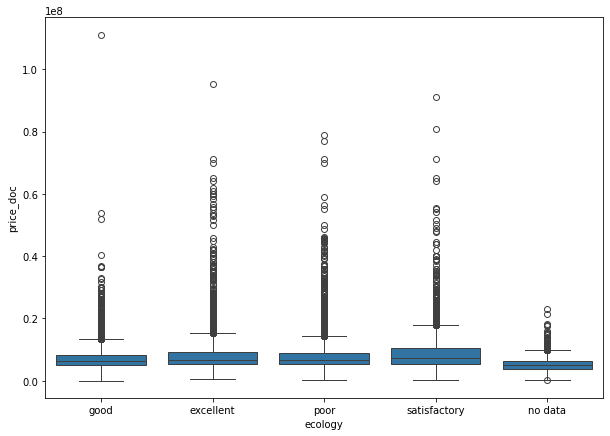

In [5]:
fig = plt.figure(figsize=(10, 7))
eco_box = sns.boxplot(
    data=sber_data,
    x='ecology',
    y='price_doc'
)


##5/12   4. Работа с пропусками: методы обработки

### Задание 4.6 (External resource)
Вам предоставлен файл test_data.csv. Прочитав этот файл, вы получите вот такой DataFrame:
    
Ваша задача — очистить данную таблицу от пропусков следующим образом:

Если признак имеет больше 50% пропущенных значений, удалите его.
Для оставшихся данных: если в строке более двух пропусков, удалите строку.
Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой.
У вас должна получиться следующая таблица df:
    
Примечание. Не забудьте импортировать библиотеки.

In [6]:
# Введите свое решение ниже
import pandas as pd

test_data = pd.read_csv('./data/test_data.csv', sep = ',')
clean_data = test_data.copy()
print(clean_data.shape)
m = clean_data.shape[0]*0.5
clean_data = clean_data.dropna(thresh=m, axis=1)
n = clean_data.shape[1] - 2
clean_data = clean_data.dropna(thresh=n, axis=0)

print(clean_data.shape)
print(clean_data)

values = {
    'one': clean_data['one'].mean(),
    'two': clean_data['two'].mean(),
    'three': clean_data['three'].mean(),
    'four': clean_data['four'].mode()[0]
}
df = clean_data.fillna(values)

print(df)

(8, 5)
(7, 4)
        one       two     three  four
0  1.331587  0.715279 -1.545400   bar
2 -0.008384  0.621336 -0.720086   bar
3  1.000000  0.500000  0.500000   NaN
4  0.265512  0.108549  0.004291   bar
5 -0.174600  0.433026  1.203037   bar
6       NaN       NaN  1.200000  hist
7 -0.965066  1.028274  0.228630   bar
        one       two     three  four
0  1.331587  0.715279 -1.545400   bar
2 -0.008384  0.621336 -0.720086   bar
3  1.000000  0.500000  0.500000   bar
4  0.265512  0.108549  0.004291   bar
5 -0.174600  0.433026  1.203037   bar
6  0.241508  0.567744  1.200000  hist
7 -0.965066  1.028274  0.228630   bar


## 7/12   6. Методы выявления выбросов

### Задание 6.1 (External resource)
Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, 
которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). 
Назовите измененную функцию: outliers_iqr_mod`
Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.


Можете протестировать работу функции на DataFrame test_sber_data.csv.

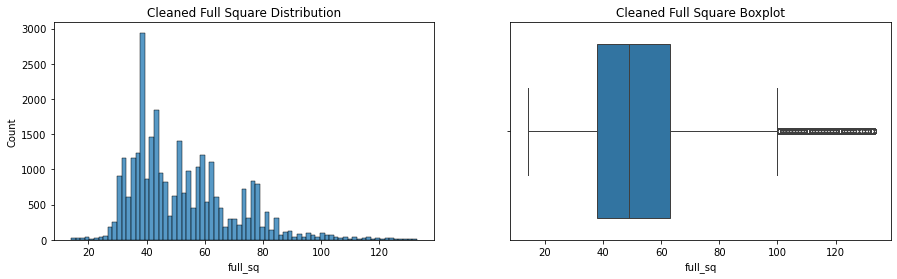

In [30]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - iqr*left
    upper_bound = quartile_3 + iqr*right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 2, 2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');




### Задание 6.2
1 point possible (graded)
Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

In [8]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq', 1, 6)
print(outliers.shape)

(59, 61)


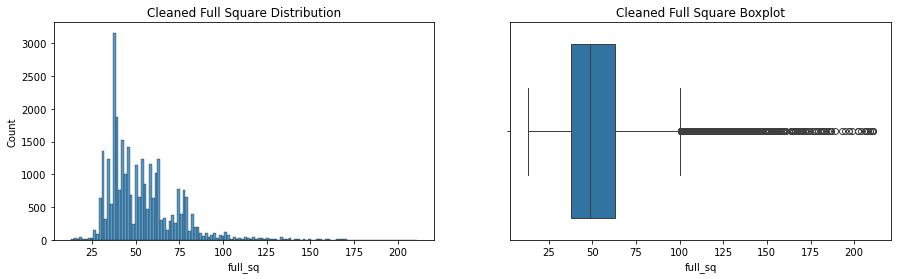

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

### Задание 6.3 (External resource)
Давайте расширим правило трёх сигм, чтобы иметь возможность учитывать особенности данных. Добавьте в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3.

Результирующую функцию назовите outliers_z_score_mod().

Можете протестировать работу функции на DataFrame test_sber_data.csv. Проверять ваше решение мы будем, подавая на вход функции вместо data произвольный датафрейм.

In [20]:
import numpy as np

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [14]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.2)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 31
Результирующее число записей: 30440


In [15]:
# print(outliers_z_score_mod(data=sber_data, feature='full_sq', right=3.5, log_scale=True))

(          id  full_sq  life_sq  floor              sub_area  preschool_quota  \
128      129      325    325.0    7.0            Ivanovskoe           2697.0   
702      703       12      8.0    4.0    Horoshevo-Mnevniki           3397.0   
997      998      183    183.0   32.0          Obruchevskoe           2372.0   
1029    1030      204    197.0    3.0            Krylatskoe           3092.0   
1085    1086       13      9.0    3.0    Horoshevo-Mnevniki           3397.0   
...      ...      ...      ...    ...                   ...              ...   
29134  29137       12      8.0    1.0            Gol'janovo           5041.0   
29310  29313      197    197.0    1.0        Juzhnoe Butovo          11926.0   
29517  29520      187    139.0    3.0             Hamovniki            165.0   
29630  29633       15     11.0    5.0  Vostochnoe Izmajlovo           1838.0   
29656  29659      211    162.0    5.0           Presnenskoe           3240.0   

       preschool_education_centers_rai

### Задание 6.4
1 point possible (graded)
Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

In [16]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


### Задание 6.5
1 point possible (graded)
Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

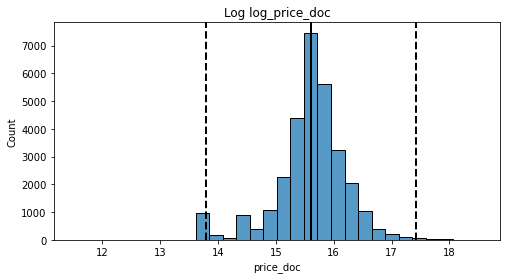

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log log_price_doc');

### Задание 6.6
1 point possible (graded)
Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

In [26]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=2.3, right=2.3)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 1481
Результирующее число записей: 28990


### Задание 6.7
1 point possible (graded)
Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

При логарифмировании признака price_doc добавлять к нему 1 не нужно, он не имеет нулевых значений!

In [ ]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', log_scale=True, left=1.5, right=1.5)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')